<a href="https://colab.research.google.com/github/Nhathuyy/Colab/blob/main/hepatitis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load libraries
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data"
names = ['sclass', 'age', 'sex', 'steroid', 'antivirals','fatigue','malaise',
         'anorexia','liver-big','liver-firm','spleen-palpable','spiders','ascites','varices',
         'bilirubin','alk-phosphate','sgot','alumin','protime','histology']
dataset = pd.read_csv(url, names=names)

In [3]:
dataset.columns

Index(['sclass', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver-big', 'liver-firm', 'spleen-palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk-phosphate', 'sgot', 'alumin',
       'protime', 'histology'],
      dtype='object')

In [4]:
dataset

,sclass,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver-big,liver-firm,spleen-palpable,spiders,ascites,varices,bilirubin,alk-phosphate,sgot,alumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,?,242,3.3,50,2
151,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,?,2
152,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,?,2
153,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2


In [5]:

print(dataset.shape)
dataset.head()

(155, 20)


,sclass,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver-big,liver-firm,spleen-palpable,spiders,ascites,varices,bilirubin,alk-phosphate,sgot,alumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


In [6]:

print(dataset.head(20))

    sclass  age  sex steroid  antivirals fatigue malaise anorexia liver-big  \
0        2   30    2       1           2       2       2        2         1   
1        2   50    1       1           2       1       2        2         1   
2        2   78    1       2           2       1       2        2         2   
3        2   31    1       ?           1       2       2        2         2   
4        2   34    1       2           2       2       2        2         2   
5        2   34    1       2           2       2       2        2         2   
6        1   51    1       1           2       1       2        1         2   
7        2   23    1       2           2       2       2        2         2   
8        2   39    1       2           2       1       2        2         2   
9        2   30    1       2           2       2       2        2         2   
10       2   39    1       1           1       2       2        2         1   
11       2   32    1       2           1       1    

In [7]:
# 
print(dataset.describe())

           sclass         age         sex  antivirals   histology
count  155.000000  155.000000  155.000000  155.000000  155.000000
mean     1.793548   41.200000    1.103226    1.845161    1.451613
std      0.406070   12.565878    0.305240    0.362923    0.499266
min      1.000000    7.000000    1.000000    1.000000    1.000000
25%      2.000000   32.000000    1.000000    2.000000    1.000000
50%      2.000000   39.000000    1.000000    2.000000    1.000000
75%      2.000000   50.000000    1.000000    2.000000    2.000000
max      2.000000   78.000000    2.000000    2.000000    2.000000


In [8]:
# class distribution
print(dataset.groupby('sclass').size())
print(dataset.groupby('age').size())
print(dataset.groupby('sex').size())
print(dataset.groupby('antivirals').size())
print(dataset.groupby('histology').size())


sclass
1     32
2    123
dtype: int64
age
7     1
20    3
22    2
23    4
24    2
25    3
26    1
27    4
28    5
30    8
31    4
32    4
33    3
34    8
35    2
36    7
37    5
38    8
39    6
40    3
41    3
42    5
43    1
44    5
45    5
46    1
47    4
48    2
49    3
50    6
51    6
52    3
53    1
54    5
56    3
57    2
58    2
59    1
60    1
61    3
62    2
64    1
65    1
66    1
67    1
69    1
70    1
72    1
78    1
dtype: int64
sex
1    139
2     16
dtype: int64
antivirals
1     24
2    131
dtype: int64
histology
1    85
2    70
dtype: int64


This gives us a much clearer idea of the distribution of the input attributes:


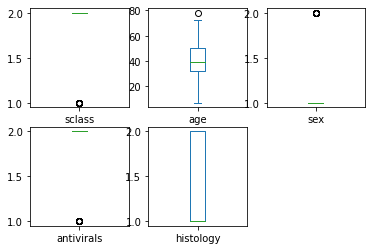

In [9]:
# box and whisker plots
dataset.plot(kind='box' , subplots=True, layout=(2,3), sharex=False, sharey=False )
#dataset.plot(kind='box', subplots=True, layout=(1,5), sharex=False, sharey=False)
print("This gives us a much clearer idea of the distribution of the input attributes:")
plt.show()

It looks like perhaps two of the input variables have a Gaussian distribution 

This is useful to note as we can use algorithms that can exploit this assumption.


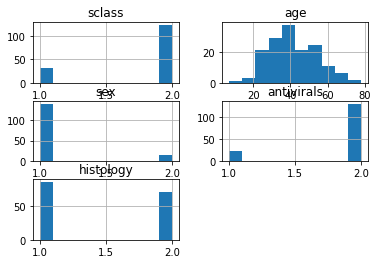

In [10]:
# histograms
dataset.hist()
print("It looks like perhaps two of the input variables have a Gaussian distribution \n")
print("This is useful to note as we can use algorithms that can exploit this assumption.")
plt.show()

Note the diagonal grouping of some pairs of attributes. This suggests a high correlation and a predictable relationship.


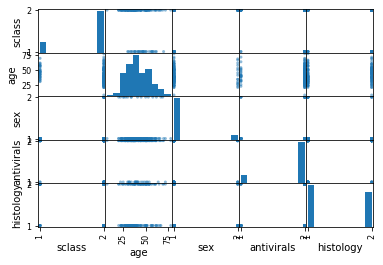

In [11]:
# scatter plot matrix
scatter_matrix(dataset)
print("Note the diagonal grouping of some pairs of attributes. \
This suggests a high correlation and a predictable relationship.") 
plt.show()

In [12]:
labels = dataset.sclass.values
#print(labels)
features = dataset[['age', 'sex', 'steroid', 'antivirals','fatigue','malaise',
         'anorexia','liver-big','liver-firm','spleen-palpable','spiders','ascites','varices',
         'bilirubin','alk-phosphate','sgot','alumin','protime','histology']]
#print(features)

In [13]:
features.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver-big,liver-firm,spleen-palpable,spiders,ascites,varices,bilirubin,alk-phosphate,sgot,alumin,protime,histology
0,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


In [14]:
pd.get_dummies(features).head()

,age,sex,antivirals,histology,steroid_1,steroid_2,steroid_?,fatigue_1,fatigue_2,fatigue_?,...,protime_74,protime_75,protime_76,protime_77,protime_78,protime_80,protime_84,protime_85,protime_90,protime_?
0,30,2,2,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,50,1,2,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,78,1,2,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,31,1,1,1,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,34,1,2,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [15]:
features_dummies = pd.get_dummies(features, columns=['steroid', 'fatigue','malaise',
         'anorexia','liver-big','liver-firm','spleen-palpable','spiders','ascites','varices',
         'bilirubin','alk-phosphate','sgot','alumin','protime'])
features_dummies.head(n=16)

,age,sex,antivirals,histology,steroid_1,steroid_2,steroid_?,fatigue_1,fatigue_2,fatigue_?,...,protime_74,protime_75,protime_76,protime_77,protime_78,protime_80,protime_84,protime_85,protime_90,protime_?
0,30,2,2,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,50,1,2,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,78,1,2,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,31,1,1,1,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,34,1,2,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
5,34,1,2,1,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
6,51,1,2,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
7,23,1,2,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
8,39,1,2,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
9,30,1,2,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [16]:
data = features_dummies.values

In [22]:
import numpy as np
np.isnan(data).any()

False

In [23]:
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
# Use PreProcessing, when database is missing

#train_data, test_data, train_labels, test_labels = train_test_split(data, labels, random_state=0)

X_train, X_validation, Y_train, Y_validation = train_test_split(data, labels, random_state=0)

# imp = Imputer()
#imp.fit(train_data)
# imp.fit(X_train)
imp_mean.fit(X_train)

#train_data_finite = imp.transform(train_data)
#test_data_finite = imp.transform(test_data)
X_data_finite = imp_mean.transform(X_train)
Y_data_finite = imp_mean.transform(X_validation)

In [25]:
from sklearn.dummy import DummyClassifier

clf = DummyClassifier(strategy="most_frequent")
#clf.fit(train_data_finite, train_labels)
clf.fit(X_data_finite, Y_train)
print("Prediction accuracy: %f" % clf.score(Y_data_finite, Y_validation))

#train_data_finite
#train_labels
#test_labels
#test_data_finite

Prediction accuracy: 0.743590


In [ ]:
# Split-out validation dataset
#array = dataset.values
#X = array[:,1:21]
#Y = array[:,0]
#validation_size = 0.20
#seed = 7
#X_train, X_validation, Y_train, Y_validation = \
 #       model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [26]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [30]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

print(type(models)) 

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

<class 'list'>


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LR: 0.844697 (0.121508)
LDA: 0.803788 (0.106139)
KNN: 0.845455 (0.141980)
CART: 0.852273 (0.104603)
NB: 0.803030 (0.110565)
SVM: 0.812879 (0.148301)


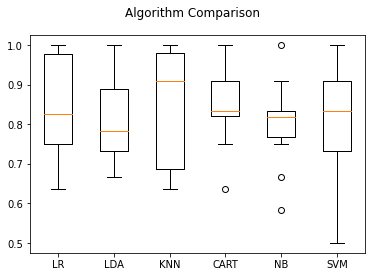

In [31]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [32]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.7435897435897436
[[ 2  8]
 [ 2 27]]
              precision    recall  f1-score   support

           1       0.50      0.20      0.29        10
           2       0.77      0.93      0.84        29

    accuracy                           0.74        39
   macro avg       0.64      0.57      0.56        39
weighted avg       0.70      0.74      0.70        39

